In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
pca = pd.read_excel('PCA India Data_Census (1).xlsx')

In [3]:
pca.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [4]:
pca.tail()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
635,34,636,Puducherry,Mahe,3333,8154,11781,1146,1203,21,...,32,47,0,0,0,0,0,0,32,47
636,34,637,Puducherry,Karaikal,10612,12346,21691,1544,1533,2234,...,155,337,3,14,38,130,4,23,110,170
637,35,638,Andaman & Nicobar Island,Nicobars,1275,1549,2630,227,225,0,...,104,134,9,4,2,6,17,47,76,77
638,35,639,Andaman & Nicobar Island,North & Middle Andaman,3762,5200,8012,723,664,0,...,136,172,24,44,11,21,1,4,100,103
639,35,640,Andaman & Nicobar Island,South Andaman,7975,11977,18049,1470,1358,0,...,173,122,6,2,17,17,2,4,148,99


In [5]:
pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [6]:
pca.describe().T

,count,mean,std,min,25%,50%,75%,max
State Code,640.0,17.114062,9.426486,1.0,9.00,18.0,24.00,35.0
Dist.Code,640.0,320.500000,184.896367,1.0,160.75,320.5,480.25,640.0
No_HH,640.0,51222.871875,48135.405475,350.0,19484.00,35837.0,68892.00,310450.0
TOT_M,640.0,79940.576563,73384.511114,391.0,30228.00,58339.0,107918.50,485417.0
TOT_F,640.0,122372.084375,113600.717282,698.0,46517.75,87724.5,164251.75,750392.0
M_06,640.0,12309.098438,11500.906881,56.0,4733.75,9159.0,16520.25,96223.0
F_06,640.0,11942.300000,11326.294567,56.0,4672.25,8663.0,15902.25,95129.0
M_SC,640.0,13820.946875,14426.373130,0.0,3466.25,9591.5,19429.75,103307.0
F_SC,640.0,20778.392188,21727.887713,0.0,5603.25,13709.0,29180.00,156429.0
M_ST,640.0,6191.807813,9912.668948,0.0,293.75,2333.5,7658.00,96785.0


In [7]:
pca.isnull().sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

In [8]:
pca.duplicated().sum()

0

In [9]:
pca.isna().sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

# This criterion is linked to a Learning OutcomePart 2 - PCA: Perform detailed Exploratory analysis by creating certain questions like (i) Which state has highest gender ratio and which has the lowest? (ii) Which district has the highest & lowest gender ratio? (Example Questions). Pick 5 variables out of the given 24 variables below for EDA: No_HH, TOT_M, TOT_F, M_06, F_06, M_SC, F_SC, M_ST, F_ST, M_LIT, F_LIT, M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, MAINWORK_F, MAIN_CL_M, MAIN_CL_F, MAIN_AL_M, MAIN_AL_F, MAIN_HH_M, MAIN_HH_F, MAIN_OT_M, MAIN_OT_F

# i) Which state has highest gender ratio and which has the lowest?

In [10]:
state_totals = pca.groupby('State')[['TOT_M', 'TOT_F']].sum()
state_totals['gender_ratio'] = state_totals['TOT_M'] / state_totals['TOT_F']
max_gender_ratio = state_totals['gender_ratio'].idxmax()

In [11]:
max_gender_ratio

'Lakshadweep'

In [12]:
min_gender_ratio = state_totals['gender_ratio'].idxmin()

In [13]:
min_gender_ratio

'Andhra Pradesh'

In [14]:
a = state_totals.sort_values(by='gender_ratio', ascending =False)

In [15]:
a

,TOT_M,TOT_F,gender_ratio
State,,,
Lakshadweep,12823,14772,0.868061
Haryana,1167816,1498873,0.779129
NCT of Delhi,833414,1075266,0.775077
Uttar Pradesh,9043969,12023885,0.752167
Meghalaya,268036,356355,0.752160
Bihar,4025198,5405883,0.744596
Punjab,1579405,2121425,0.744502
Jammu & Kashmir,421213,572959,0.735154
Daman & Diu,13153,18706,0.703143


In [16]:
dataframe = a.iloc[[0,-1],:]
df2 = pd.DataFrame(dataframe)
df2

,TOT_M,TOT_F,gender_ratio
State,,,
Lakshadweep,12823,14772,0.868061
Andhra Pradesh,3274363,6097235,0.537024


# (ii) Which district has the highest & lowest gender ratio?

In [17]:
district_totals = pca.groupby('Area Name')[['TOT_M', 'TOT_F']].sum()
district_totals['gender_ratio'] = district_totals['TOT_M'] / district_totals['TOT_F']
max_gender_ratio = district_totals['gender_ratio'].idxmax()

In [18]:
max_gender_ratio

'Lakshadweep'

In [19]:
min_gender_ratio = district_totals['gender_ratio'].idxmin()

In [20]:
min_gender_ratio

'Krishna'

In [21]:
a =district_totals.sort_values(by='gender_ratio',ascending=False)

In [22]:
a

,TOT_M,TOT_F,gender_ratio
Area Name,,,
Lakshadweep,12823,14772,0.868061
Badgam,19585,23102,0.847762
Mahamaya Nagar,67258,79378,0.847313
Dhaulpur,31904,37671,0.846911
Baghpat,54807,64937,0.844003
...,...,...,...
Baudh,8672,19209,0.451455
West Godavari,123111,273534,0.450076
Virudhunagar,66704,148445,0.449352


In [23]:
selected_columns = a.iloc[[0, -1],:]

In [24]:
df3 = pd.DataFrame(selected_columns)

In [25]:
df3

,TOT_M,TOT_F,gender_ratio
Area Name,,,
Lakshadweep,12823,14772,0.868061
Krishna,137603,314182,0.437972


# EDA

In [26]:
columns_to_keep = ['No_HH','TOT_M','TOT_F','M_06','F_06']
pca_new = pca.loc[:,columns_to_keep]
pca_new

,No_HH,TOT_M,TOT_F,M_06,F_06
0,7707,23388,29796,5862,6196
1,6218,19585,23102,4482,3733
2,4452,6546,10964,1082,1018
3,1320,2784,4206,563,677
4,11654,20591,29981,5157,4587
...,...,...,...,...,...
635,3333,8154,11781,1146,1203
636,10612,12346,21691,1544,1533
637,1275,1549,2630,227,225
638,3762,5200,8012,723,664


In [27]:
len(pca_new.columns)

5

<Figure size 400x500 with 0 Axes>

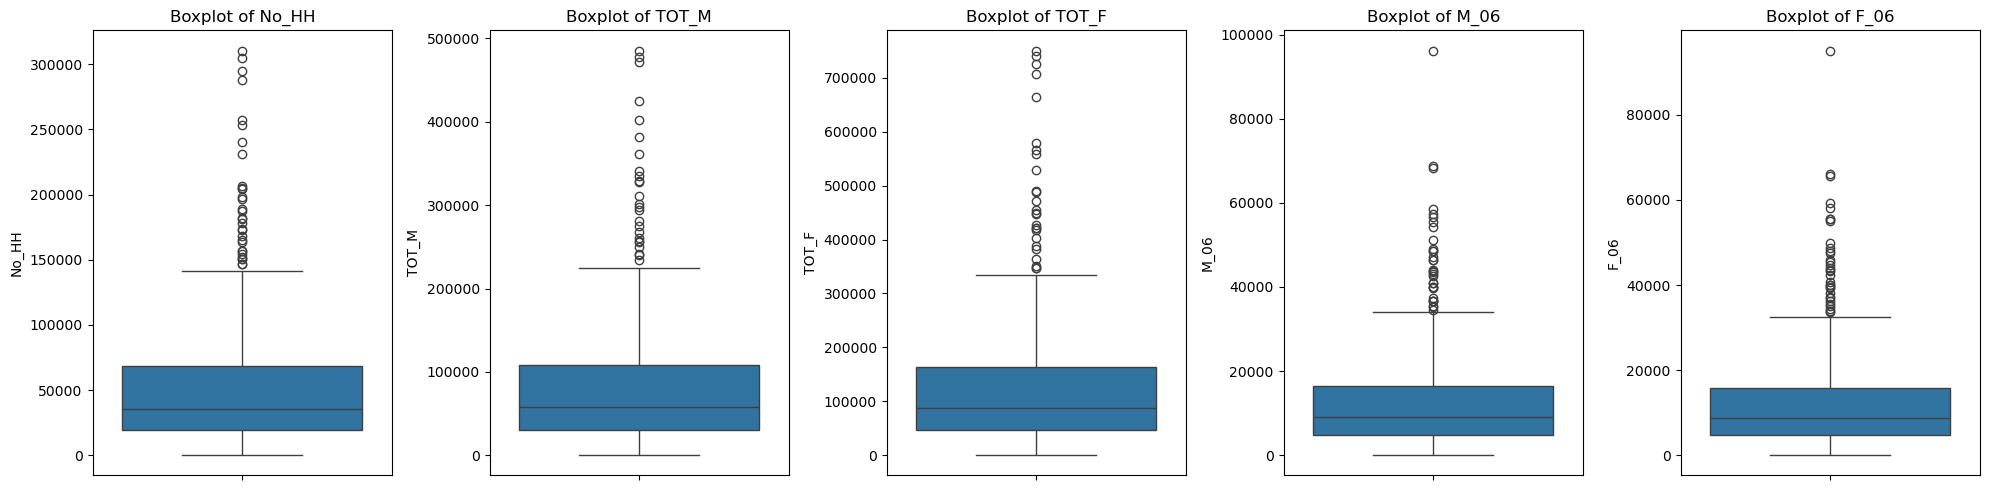

In [28]:
# Check the outliers if it's present or not
plt.figure(figsize=(4,5))
new_list = pca_new.columns
fig, axes = plt.subplots(1, 5, figsize=(20,5))
for i in range(len(new_list)):
    sns.boxplot(y=pca_new[new_list[i]], ax=axes[i])
    axes[i].set_title("Boxplot of {}".format(new_list[i]))

plt.tight_layout()
plt.show()

In [29]:
pca_new.describe().T

,count,mean,std,min,25%,50%,75%,max
No_HH,640.0,51222.871875,48135.405475,350.0,19484.00,35837.0,68892.00,310450.0
TOT_M,640.0,79940.576563,73384.511114,391.0,30228.00,58339.0,107918.50,485417.0
TOT_F,640.0,122372.084375,113600.717282,698.0,46517.75,87724.5,164251.75,750392.0
M_06,640.0,12309.098438,11500.906881,56.0,4733.75,9159.0,16520.25,96223.0
F_06,640.0,11942.300000,11326.294567,56.0,4672.25,8663.0,15902.25,95129.0


In [30]:
pca = pca.drop(['State','State Code','Area Name','Dist.Code'], axis = 1)

In [31]:
pca.dtypes

No_HH             int64
TOT_M             int64
TOT_F             int64
M_06              int64
F_06              int64
M_SC              int64
F_SC              int64
M_ST              int64
F_ST              int64
M_LIT             int64
F_LIT             int64
M_ILL             int64
F_ILL             int64
TOT_WORK_M        int64
TOT_WORK_F        int64
MAINWORK_M        int64
MAINWORK_F        int64
MAIN_CL_M         int64
MAIN_CL_F         int64
MAIN_AL_M         int64
MAIN_AL_F         int64
MAIN_HH_M         int64
MAIN_HH_F         int64
MAIN_OT_M         int64
MAIN_OT_F         int64
MARGWORK_M        int64
MARGWORK_F        int64
MARG_CL_M         int64
MARG_CL_F         int64
MARG_AL_M         int64
MARG_AL_F         int64
MARG_HH_M         int64
MARG_HH_F         int64
MARG_OT_M         int64
MARG_OT_F         int64
MARGWORK_3_6_M    int64
MARGWORK_3_6_F    int64
MARG_CL_3_6_M     int64
MARG_CL_3_6_F     int64
MARG_AL_3_6_M     int64
MARG_AL_3_6_F     int64
MARG_HH_3_6_M   

In [32]:
#Scale the data
from scipy.stats import zscore
pca_scaled = pca.apply(zscore)

In [33]:
pca_scaled.head()

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,-0.904738,-0.771236,-0.815563,-0.561012,-0.507738,-0.958575,-0.957049,-0.423306,-0.476423,-0.798097,...,-0.163229,-0.720610,-0.156494,-0.287524,0.156577,-0.657412,-0.365258,-0.499977,-0.413053,-0.539614
1,-0.935695,-0.823100,-0.874534,-0.681096,-0.725367,-0.958297,-0.956772,-0.582014,-0.607607,-0.849434,...,-0.583103,-0.732811,-0.282327,-0.294688,-0.491731,-0.723062,0.042855,-0.073481,-0.606455,-0.598988
2,-0.972412,-1.000919,-0.981466,-0.976956,-0.965262,-0.958575,-0.956772,-0.038951,-0.027273,-0.956457,...,-0.859212,-0.921931,-0.456727,-0.420050,-0.731894,-0.795026,-0.662068,-0.635680,-0.726103,-0.707839
3,-1.037530,-1.052224,-1.041001,-1.022118,-0.995393,-0.958783,-0.957049,-0.355965,-0.390060,-1.004643,...,-0.805468,-0.900758,-0.419198,-0.385127,-0.718770,-0.784926,-0.624966,-0.616294,-0.645791,-0.710038
4,-0.822676,-0.809381,-0.813933,-0.622359,-0.649908,-0.957395,-0.955529,0.149238,0.043330,-0.800568,...,-0.348645,-0.297513,0.472670,0.434200,-0.466796,-0.625849,-0.439461,-0.309346,-0.540895,-0.249344


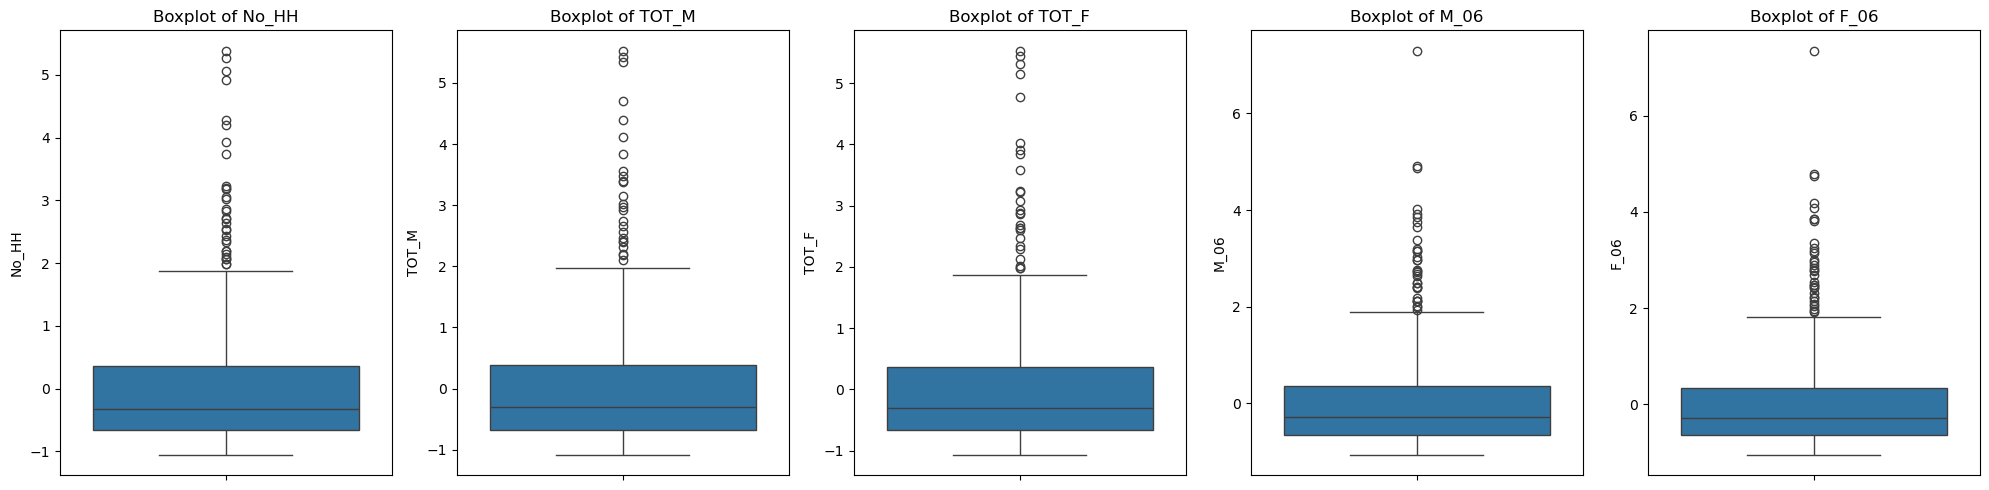

In [62]:
fig, axes = plt.subplots(1, min(5, len(new_list)), figsize=(20,5))
for i in range(min(5, len(new_list))):
    sns.boxplot(y=pca_scaled[new_list[i]], ax=axes[i])
    axes[i].set_title("Boxplot of {}".format(new_list[i]))

plt.tight_layout()

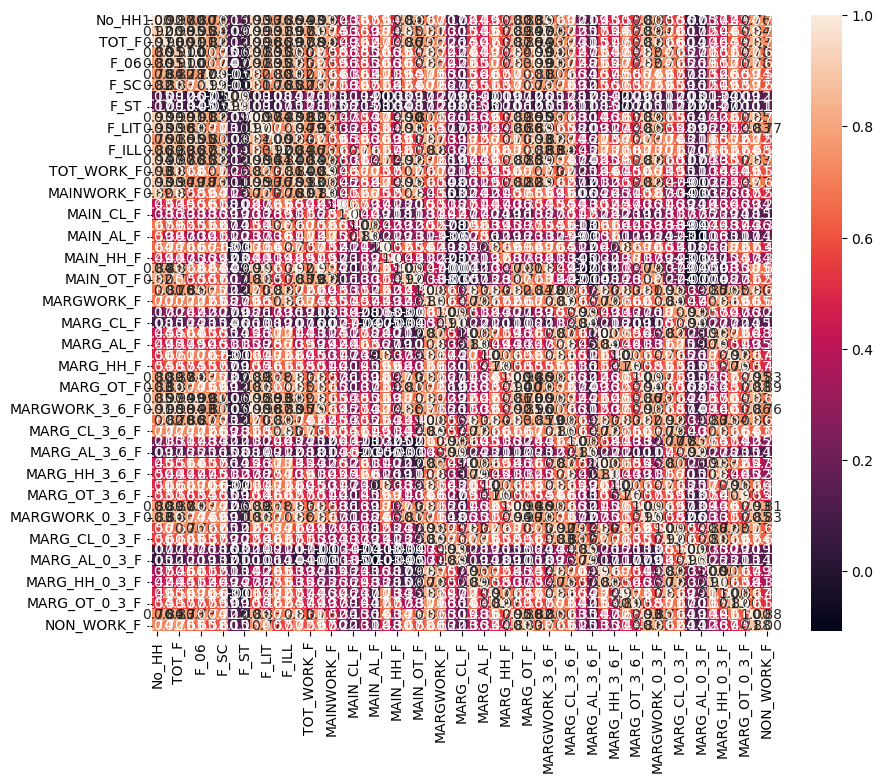

In [34]:
#Correlations
plt.figure(figsize=(10,8))
sns.heatmap(pca_scaled.corr(),annot = True, fmt = '.2f');

# Perform all the required steps for PCA (use sklearn only) Create the covariance Matrix Get eigen values and eigen vector.

In [35]:
#Barlett Spherecity test for statistical significance
#Lets do with hypothesis
#H0: Correlations are not significant
#H1:Correlations are significant
#reject H0 if p_vlaue < 0.05

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(pca_scaled)
p_value

C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\factor_analyzer\factor_analyzer.py:109: RuntimeWarning: divide by zero encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


0.0

# we reject the null hypothesis and we say correlations are significant

In [36]:
#adequacy of sample size. 
#Note: Above 0.7 is good, below 0.5 is not acceptable
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(pca_scaled)
kmo_model

C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.803988993278217

In [37]:
#Apply PCA
from sklearn.decomposition import PCA
pca_applied = PCA(n_components=12, random_state=123)
pca_transformed = pca_applied.fit_transform(pca_scaled)

In [38]:
#Eigen_vectors
pca_applied.components_

array([[ 1.56020579e-01,  1.67117635e-01,  1.65553179e-01,
         1.62192948e-01,  1.62566396e-01,  1.51357849e-01,
         1.51566500e-01,  2.72341946e-02,  2.81833150e-02,
         1.61992837e-01,  1.46872680e-01,  1.61749445e-01,
         1.65248187e-01,  1.59871988e-01,  1.45935804e-01,
         1.46200730e-01,  1.23970284e-01,  1.03127159e-01,
         7.45397856e-02,  1.13355712e-01,  7.38821590e-02,
         1.31572584e-01,  8.33826397e-02,  1.23526242e-01,
         1.11021264e-01,  1.64615479e-01,  1.55395618e-01,
         8.23885414e-02,  4.91953957e-02,  1.28598563e-01,
         1.14305073e-01,  1.40853227e-01,  1.27669598e-01,
         1.55262872e-01,  1.47286584e-01,  1.64971950e-01,
         1.61253433e-01,  1.65501611e-01,  1.55647049e-01,
         9.30142064e-02,  5.15358640e-02,  1.28576116e-01,
         1.10645843e-01,  1.39592763e-01,  1.24545909e-01,
         1.54293786e-01,  1.46285654e-01,  1.50125706e-01,
         1.40157047e-01,  5.25417829e-02,  4.17859530e-0

In [39]:
#Check the eigen values
pca_applied.explained_variance_ratio_

array([0.55726063, 0.13784435, 0.07275295, 0.06426418, 0.03865049,
       0.03395169, 0.02060239, 0.01315764, 0.01080859, 0.00925395,
       0.00752912, 0.00619102])

In [40]:
pca_coefficients = pd.DataFrame(pca_applied.components_.T,
                               columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7','PC8', 'PC9', 'PC10', 'PC11', 'PC12'], index = pca_scaled.columns)

In [41]:
pca_coefficients

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
No_HH,0.156021,-0.126347,-0.002690,-0.125293,-0.007022,0.004083,-0.118110,0.057239,0.004263,0.019988,0.010595,0.086181
TOT_M,0.167118,-0.089677,0.056698,-0.019942,-0.033026,-0.073389,0.089554,0.111431,0.018872,-0.024502,0.011145,0.018851
TOT_F,0.165553,-0.104912,0.038749,-0.070873,-0.012847,-0.043647,-0.002124,0.088355,0.014911,-0.038040,0.007735,0.093546
M_06,0.162193,-0.022095,0.057788,0.011917,-0.050248,-0.157957,0.165067,0.169595,-0.056772,-0.153575,0.081251,0.104358
F_06,0.162566,-0.020271,0.050126,0.014844,-0.043848,-0.154436,0.169082,0.169458,-0.059322,-0.169568,0.081963,0.105285
M_SC,0.151358,-0.045111,0.002569,0.012485,-0.173007,-0.064295,-0.001566,-0.129301,0.037481,0.448516,-0.228822,-0.076361
F_SC,0.151567,-0.051924,-0.025101,-0.029893,-0.159803,-0.040518,-0.084658,-0.144352,0.041232,0.446968,-0.213023,-0.010992
M_ST,0.027234,0.027679,-0.123504,-0.222247,0.433163,0.222591,0.405505,0.021982,0.018632,0.160418,0.067589,0.014768
F_ST,0.028183,0.030223,-0.139769,-0.229754,0.438792,0.225531,0.357800,0.014874,0.043866,0.134863,0.053348,0.022338
M_LIT,0.161993,-0.115355,0.082168,-0.035163,-0.009101,-0.055465,0.045934,0.099423,0.045194,-0.005752,-0.030218,0.075911


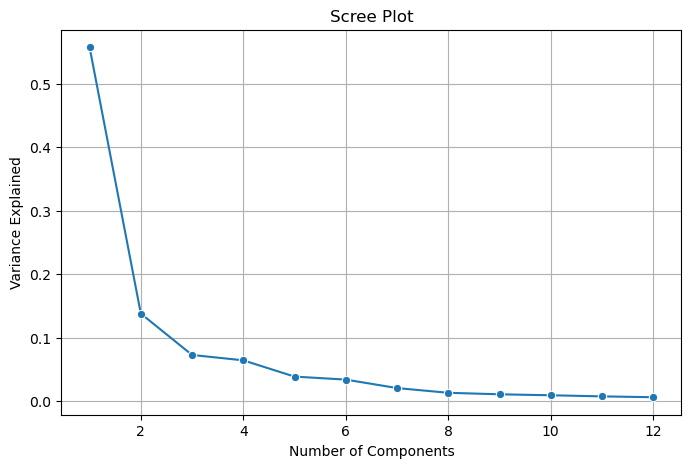

In [42]:
#Create a scree plot
plt.figure(figsize=(8,5))
sns.lineplot(y=pca_applied.explained_variance_ratio_ ,x=range(1,13),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

In [43]:
#Check the cumulative explained variance ratio to find a cut off for selecting the number of PCs
np.cumsum(pca_applied.explained_variance_ratio_)

array([0.55726063, 0.69510499, 0.76785794, 0.83212212, 0.87077261,
       0.9047243 , 0.92532669, 0.93848433, 0.94929292, 0.95854687,
       0.96607599, 0.97226701])

In [44]:
#Choose the PCs basis cumulative explained variance
pca_selected = pca_coefficients[['PC1','PC2', 'PC3', 'PC4', 'PC5']]

In [45]:
pca_selected

,PC1,PC2,PC3,PC4,PC5
No_HH,0.156021,-0.126347,-0.002690,-0.125293,-0.007022
TOT_M,0.167118,-0.089677,0.056698,-0.019942,-0.033026
TOT_F,0.165553,-0.104912,0.038749,-0.070873,-0.012847
M_06,0.162193,-0.022095,0.057788,0.011917,-0.050248
F_06,0.162566,-0.020271,0.050126,0.014844,-0.043848
M_SC,0.151358,-0.045111,0.002569,0.012485,-0.173007
F_SC,0.151567,-0.051924,-0.025101,-0.029893,-0.159803
M_ST,0.027234,0.027679,-0.123504,-0.222247,0.433163
F_ST,0.028183,0.030223,-0.139769,-0.229754,0.438792
M_LIT,0.161993,-0.115355,0.082168,-0.035163,-0.009101


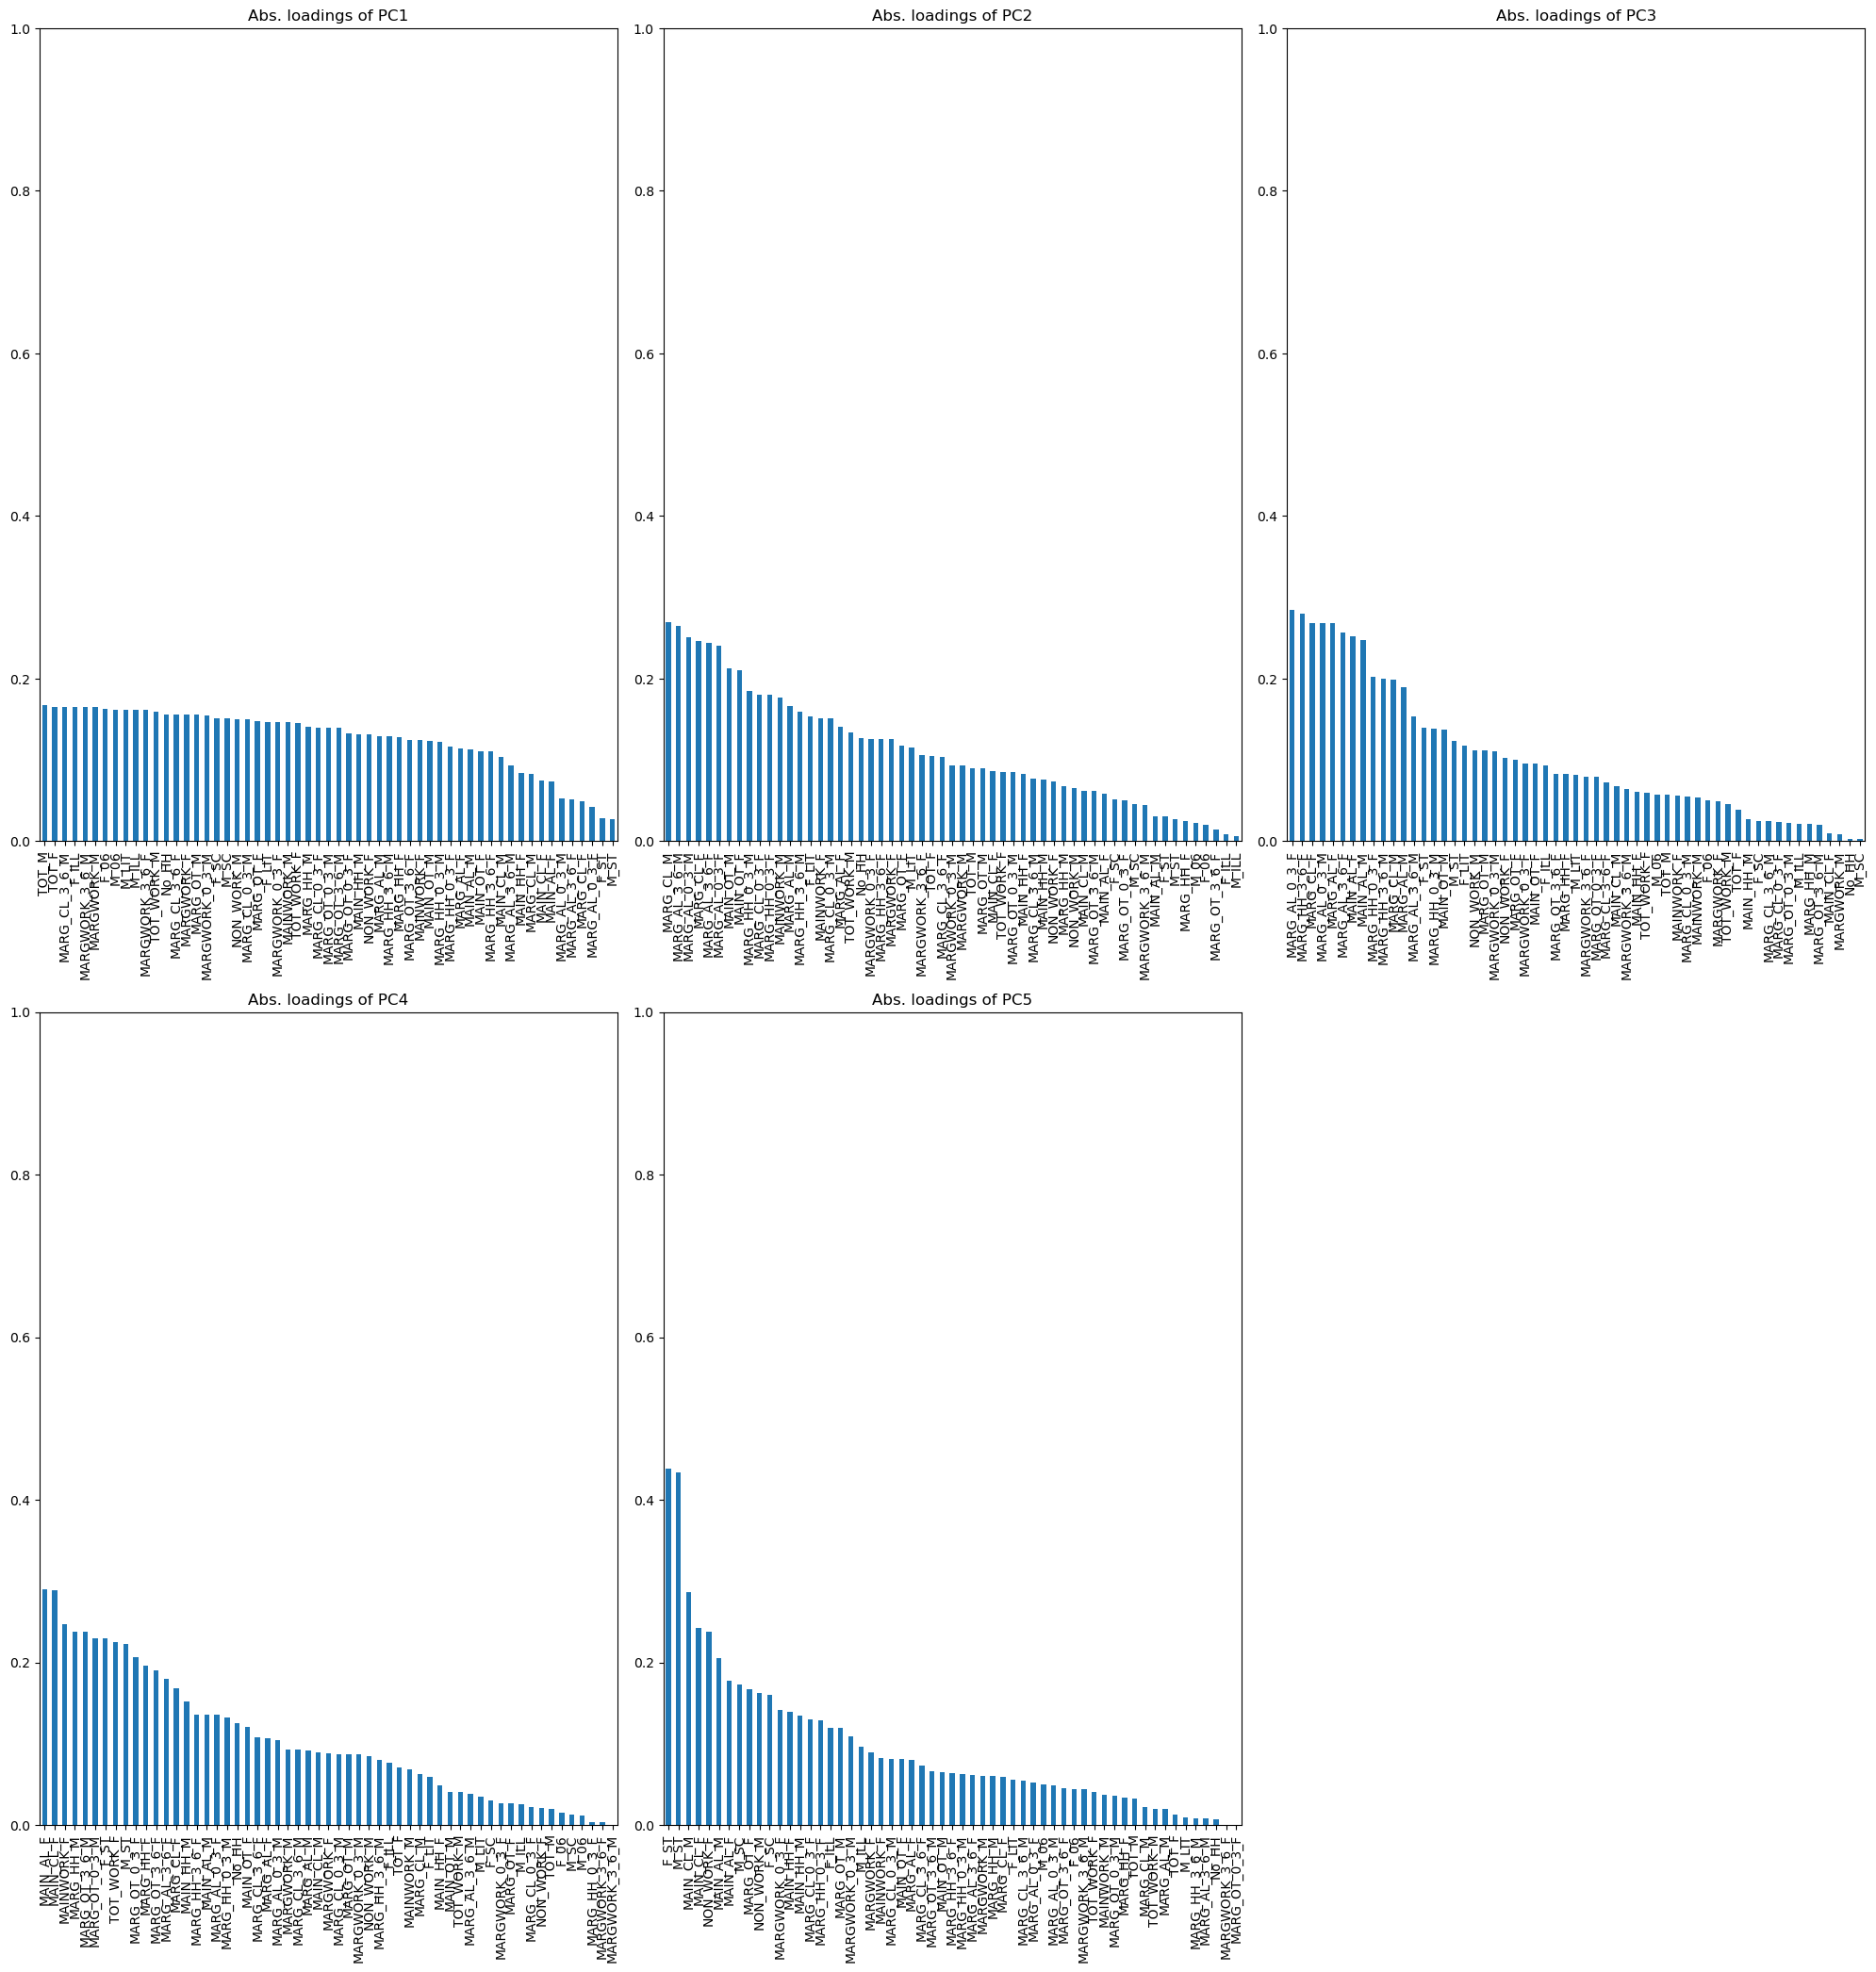

In [60]:
#Check as to how the original features matter to each PC
#Note: Here we are only considering the absolute values
plt.figure(figsize = (20,30))
for i in range(len(pca_selected.columns)):
    plt.subplot(3,3,i+1)
    abs(pca_selected[pca_selected.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(pca_selected.columns[i]))
    plt.tight_layout()

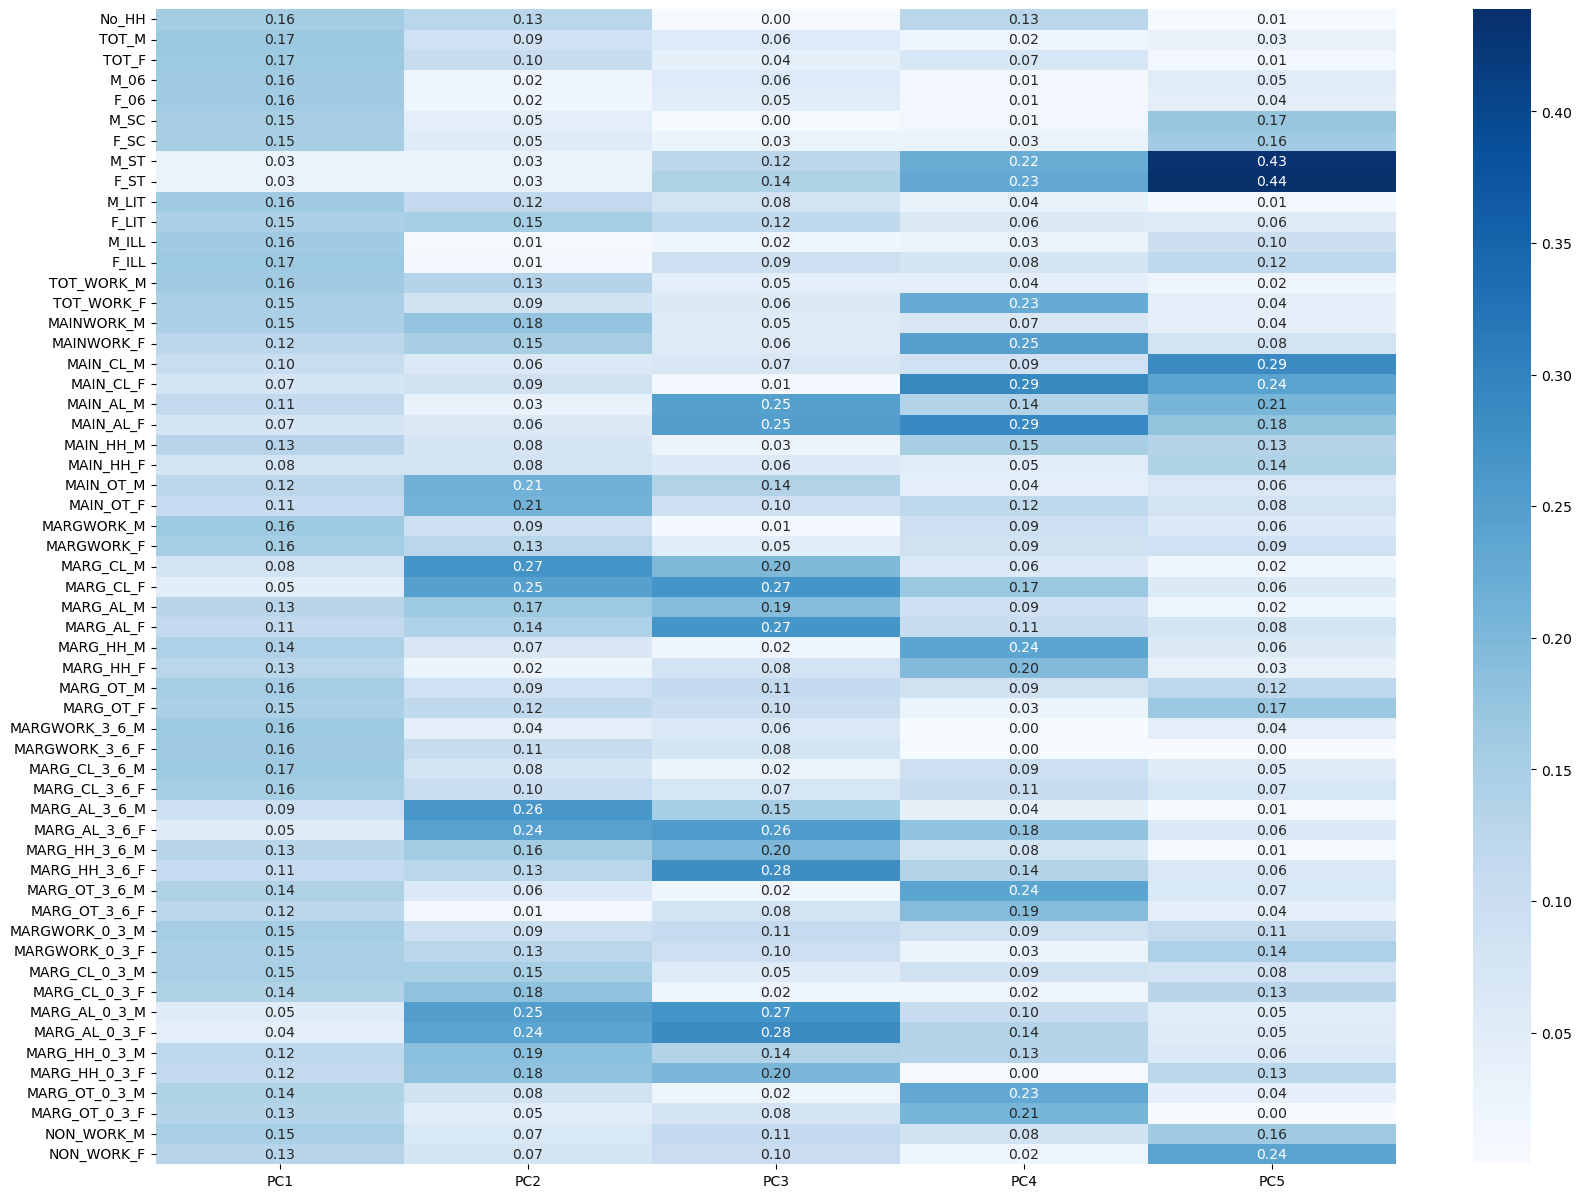

In [47]:
#Compare how the original features influence various PCs
plt.figure(figsize = (20,15))
sns.heatmap(abs(pca_selected), annot = True, cmap = 'Blues',fmt = '.2f');

In [48]:
#In order to calculate PC scores we need loadings, below:
pca_coefficients

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
No_HH,0.156021,-0.126347,-0.002690,-0.125293,-0.007022,0.004083,-0.118110,0.057239,0.004263,0.019988,0.010595,0.086181
TOT_M,0.167118,-0.089677,0.056698,-0.019942,-0.033026,-0.073389,0.089554,0.111431,0.018872,-0.024502,0.011145,0.018851
TOT_F,0.165553,-0.104912,0.038749,-0.070873,-0.012847,-0.043647,-0.002124,0.088355,0.014911,-0.038040,0.007735,0.093546
M_06,0.162193,-0.022095,0.057788,0.011917,-0.050248,-0.157957,0.165067,0.169595,-0.056772,-0.153575,0.081251,0.104358
F_06,0.162566,-0.020271,0.050126,0.014844,-0.043848,-0.154436,0.169082,0.169458,-0.059322,-0.169568,0.081963,0.105285
M_SC,0.151358,-0.045111,0.002569,0.012485,-0.173007,-0.064295,-0.001566,-0.129301,0.037481,0.448516,-0.228822,-0.076361
F_SC,0.151567,-0.051924,-0.025101,-0.029893,-0.159803,-0.040518,-0.084658,-0.144352,0.041232,0.446968,-0.213023,-0.010992
M_ST,0.027234,0.027679,-0.123504,-0.222247,0.433163,0.222591,0.405505,0.021982,0.018632,0.160418,0.067589,0.014768
F_ST,0.028183,0.030223,-0.139769,-0.229754,0.438792,0.225531,0.357800,0.014874,0.043866,0.134863,0.053348,0.022338
M_LIT,0.161993,-0.115355,0.082168,-0.035163,-0.009101,-0.055465,0.045934,0.099423,0.045194,-0.005752,-0.030218,0.075911


In [49]:
pca_scaled.iloc[0]

No_HH            -0.904738
TOT_M            -0.771236
TOT_F            -0.815563
M_06             -0.561012
F_06             -0.507738
M_SC             -0.958575
F_SC             -0.957049
M_ST             -0.423306
F_ST             -0.476423
M_LIT            -0.798097
F_LIT            -0.733477
M_ILL            -0.604015
F_ILL            -0.798229
TOT_WORK_M       -0.859260
TOT_WORK_F       -1.010238
MAINWORK_M       -0.872367
MAINWORK_F       -0.898216
MAIN_CL_M        -1.042844
MAIN_CL_F        -0.986630
MAIN_AL_M        -0.851060
MAIN_AL_F        -0.683276
MAIN_HH_M        -0.630766
MAIN_HH_F        -0.407555
MAIN_OT_M        -0.624042
MAIN_OT_F        -0.611637
MARGWORK_M       -0.516943
MARGWORK_F       -0.966512
MARG_CL_M        -0.321809
MARG_CL_F        -0.485053
MARG_AL_M        -0.331426
MARG_AL_F        -0.860192
MARG_HH_M        -0.377984
MARG_HH_F        -0.453026
MARG_OT_M        -0.548764
MARG_OT_F        -0.614625
MARGWORK_3_6_M   -0.648040
MARGWORK_3_6_F   -0.663795
M

In [50]:
#We need to perform a dot product between the loadings and features to obtain the scores
for i in pca_selected.columns:
    pc_score = np.dot(pca_selected[i], pca_scaled.iloc[0])
    print(round(pc_score, 6), end = ' ')

-4.617263 0.138116 0.328545 1.543697 0.353737 

In [51]:
cum_var_exp = np.cumsum(pca_applied.explained_variance_ratio_)
cum_var_exp

array([0.55726063, 0.69510499, 0.76785794, 0.83212212, 0.87077261,
       0.9047243 , 0.92532669, 0.93848433, 0.94929292, 0.95854687,
       0.96607599, 0.97226701])

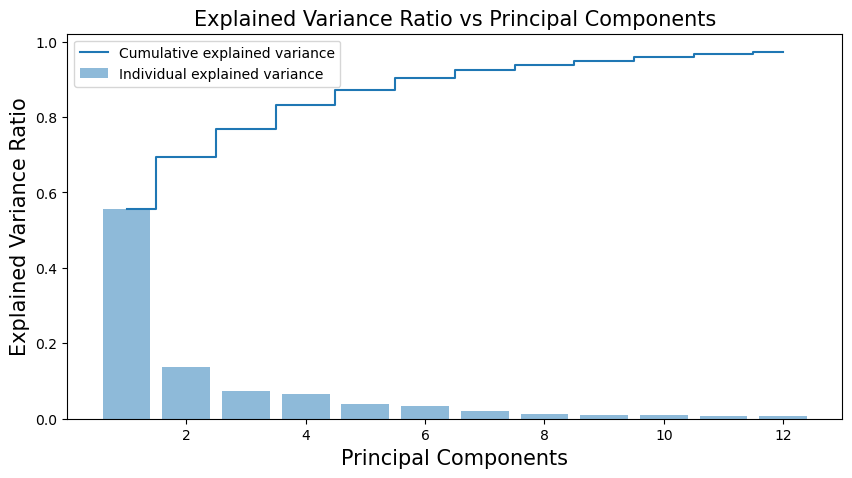

In [64]:
# Ploting  -Option -2 Plot Cumulative explained variance and individual explained variance vs Principal Components
plt.figure(figsize=(10 ,5))
plt.bar(range(1, pca_applied.explained_variance_ratio_.size + 1), pca_applied.explained_variance_ratio_, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, pca_applied.explained_variance_ratio_.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio',fontsize=15)
plt.xlabel('Principal Components',fontsize=15)
plt.title('Explained Variance Ratio vs Principal Components',fontsize=15)
plt.legend(loc = 'best')
#plt.grid()
plt.show()

In [53]:
my_list=['a','b','c']
my_list

['a', 'b', 'c']

In [54]:
for i,j in enumerate(my_list):
    print(i,j)

0 a
1 b
2 c


In [55]:
# find the least number of components that can explain more than 90% variance
sum = 0
for ix, i in enumerate(pca_applied.explained_variance_ratio_):
  sum = sum + i
  if(sum>0.90):
    print("Number of PCs that explain at least 90% variance: ", ix+1)
    break

Number of PCs that explain at least 90% variance:  6


# The 6 th component can explain more than 90% of original variance

In [57]:
pc_comps = ['PC1','PC2','PC3','PC4','PC5']
data_pca = pd.DataFrame(np.round(pca_applied.components_[:5,:],2),index=pc_comps,columns=pca_scaled.columns)
data_pca.T

,PC1,PC2,PC3,PC4,PC5
No_HH,0.16,-0.13,-0.00,-0.13,-0.01
TOT_M,0.17,-0.09,0.06,-0.02,-0.03
TOT_F,0.17,-0.10,0.04,-0.07,-0.01
M_06,0.16,-0.02,0.06,0.01,-0.05
F_06,0.16,-0.02,0.05,0.01,-0.04
M_SC,0.15,-0.05,0.00,0.01,-0.17
F_SC,0.15,-0.05,-0.03,-0.03,-0.16
M_ST,0.03,0.03,-0.12,-0.22,0.43
F_ST,0.03,0.03,-0.14,-0.23,0.44
M_LIT,0.16,-0.12,0.08,-0.04,-0.01


In [65]:
def color_high(val):
    if val <= -0.17: # you can decide any value as per your understanding
        return 'background: pink'
    elif val >= 0.17:
        return 'background: skyblue'   
    
data_pca.T.style.applymap(color_high)

,PC1,PC2,PC3,PC4,PC5
No_HH,0.160000,-0.130000,-0.000000,-0.130000,-0.010000
TOT_M,0.170000,-0.090000,0.060000,-0.020000,-0.030000
TOT_F,0.170000,-0.100000,0.040000,-0.070000,-0.010000
M_06,0.160000,-0.020000,0.060000,0.010000,-0.050000
F_06,0.160000,-0.020000,0.050000,0.010000,-0.040000
M_SC,0.150000,-0.050000,0.000000,0.010000,-0.170000
F_SC,0.150000,-0.050000,-0.030000,-0.030000,-0.160000
M_ST,0.030000,0.030000,-0.120000,-0.220000,0.430000
F_ST,0.030000,0.030000,-0.140000,-0.230000,0.440000
M_LIT,0.160000,-0.120000,0.080000,-0.040000,-0.010000


In [59]:
#('The Linear eq of 1st component: ')
for i in range(0,pca_scaled.shape[1]):
    print('{} * {}'.format(np.round(pca_applied.components_[0][i],2),pca_scaled.columns[i]),end=' (+) ')

0.16 * No_HH (+) 0.17 * TOT_M (+) 0.17 * TOT_F (+) 0.16 * M_06 (+) 0.16 * F_06 (+) 0.15 * M_SC (+) 0.15 * F_SC (+) 0.03 * M_ST (+) 0.03 * F_ST (+) 0.16 * M_LIT (+) 0.15 * F_LIT (+) 0.16 * M_ILL (+) 0.17 * F_ILL (+) 0.16 * TOT_WORK_M (+) 0.15 * TOT_WORK_F (+) 0.15 * MAINWORK_M (+) 0.12 * MAINWORK_F (+) 0.1 * MAIN_CL_M (+) 0.07 * MAIN_CL_F (+) 0.11 * MAIN_AL_M (+) 0.07 * MAIN_AL_F (+) 0.13 * MAIN_HH_M (+) 0.08 * MAIN_HH_F (+) 0.12 * MAIN_OT_M (+) 0.11 * MAIN_OT_F (+) 0.16 * MARGWORK_M (+) 0.16 * MARGWORK_F (+) 0.08 * MARG_CL_M (+) 0.05 * MARG_CL_F (+) 0.13 * MARG_AL_M (+) 0.11 * MARG_AL_F (+) 0.14 * MARG_HH_M (+) 0.13 * MARG_HH_F (+) 0.16 * MARG_OT_M (+) 0.15 * MARG_OT_F (+) 0.16 * MARGWORK_3_6_M (+) 0.16 * MARGWORK_3_6_F (+) 0.17 * MARG_CL_3_6_M (+) 0.16 * MARG_CL_3_6_F (+) 0.09 * MARG_AL_3_6_M (+) 0.05 * MARG_AL_3_6_F (+) 0.13 * MARG_HH_3_6_M (+) 0.11 * MARG_HH_3_6_F (+) 0.14 * MARG_OT_3_6_M (+) 0.12 * MARG_OT_3_6_F (+) 0.15 * MARGWORK_0_3_M (+) 0.15 * MARGWORK_0_3_F (+) 0.15 * MARG_CL